In [1]:
from BOVW import BOVW
import numpy as np
from matplotlib import pyplot as plt
from pathlib import Path
from sklearn.metrics import ConfusionMatrixDisplay
import pickle, dill

In [2]:
path = "../../../dataset/train/"
path_valid = "../../../dataset/valid/"
path_test = "../../../dataset/test/"

valid_images_path = list(Path(path_valid).rglob(f"*.jpg"))
test_images_path = list(Path(path_test).rglob(f"*.jpg"))

In [5]:
bovw = BOVW(num_cluster=150, step_size=15)

In [6]:
train_hist, labels, train_paths = bovw.create_train_Vocabulary(path, "jpg", "./bovw")

Extracting SIFT from image ..\..\..\dataset\train\unsavory\5610.jpg...: 100%|██████████| 11220/11220 [14:00<00:00, 13.36it/s]


Visual words computed in: 7746.344157099999
BOVW computed in: 18.03957730000002
SVC fitted in: 4.081007200000386


Normalized Histogram - Training Accuracy: 0.9195187165775401


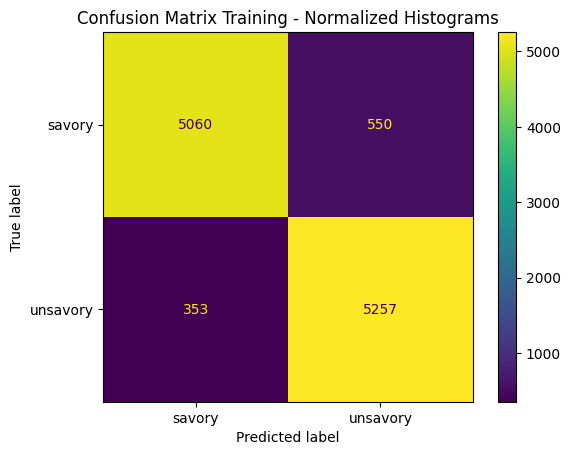

In [7]:
print(f"Normalized Histogram - Training Accuracy: {np.mean(bovw.model.predict(train_hist) == labels)}")
ConfusionMatrixDisplay.from_estimator(bovw.model, train_hist, labels)
plt.title("Confusion Matrix Training - Normalized Histograms")
plt.show()

## Load after training for validation phase

In [3]:
bovw = BOVW.load_model('./bovw/bovw.pkl')

Extracting SIFT from image ..\..\..\dataset\valid\unsavory\300.jpg...: 100%|██████████| 600/600 [00:21<00:00, 28.07it/s]


BOVW computed in: 3.206900400000002
Normalized Histogram - Test Accuracy: 0.8366666666666667


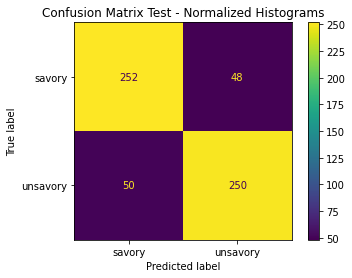

In [4]:
descr_val, labels_val, val_path = bovw.extract_Sifts(path_valid, 'jpg')
histogram_val = bovw.compute_histogram(descr_val, labels_val)
predictions_val =  [i for i in bovw.model.predict(histogram_val)]

print(f"Normalized Histogram - Test Accuracy: {np.mean(bovw.model.predict(histogram_val) == labels_val)}")

ConfusionMatrixDisplay.from_estimator(bovw.model, histogram_val, labels_val)
plt.title("Confusion Matrix Test - Normalized Histograms")
plt.show()

## Load after training for test phase

In [8]:
bovw = BOVW.load_model('./bovw/bovw.pkl')

Extracting SIFT from image ..\..\..\dataset\test\unsavory\300.jpg...: 100%|██████████| 600/600 [00:39<00:00, 15.22it/s]


BOVW computed in: 0.8278315000006842
Normalized Histogram - Test Accuracy: 0.9116666666666666


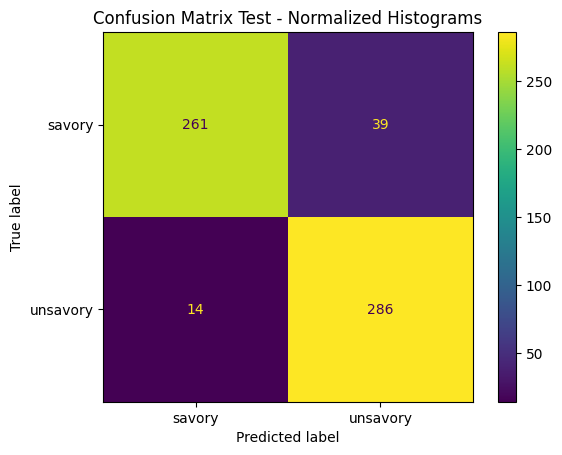

In [9]:
descr_test, labels_test, test_path = bovw.extract_Sifts(path_test, 'jpg')
histogram_test = bovw.compute_histogram(descr_test, labels_test)
predictions =  [i for i in bovw.model.predict(histogram_test)]

print(f"Normalized Histogram - Test Accuracy: {np.mean(bovw.model.predict(histogram_test) == labels_test)}")

ConfusionMatrixDisplay.from_estimator(bovw.model, histogram_test, labels_test)
plt.title("Confusion Matrix Test - Normalized Histograms")
plt.show()

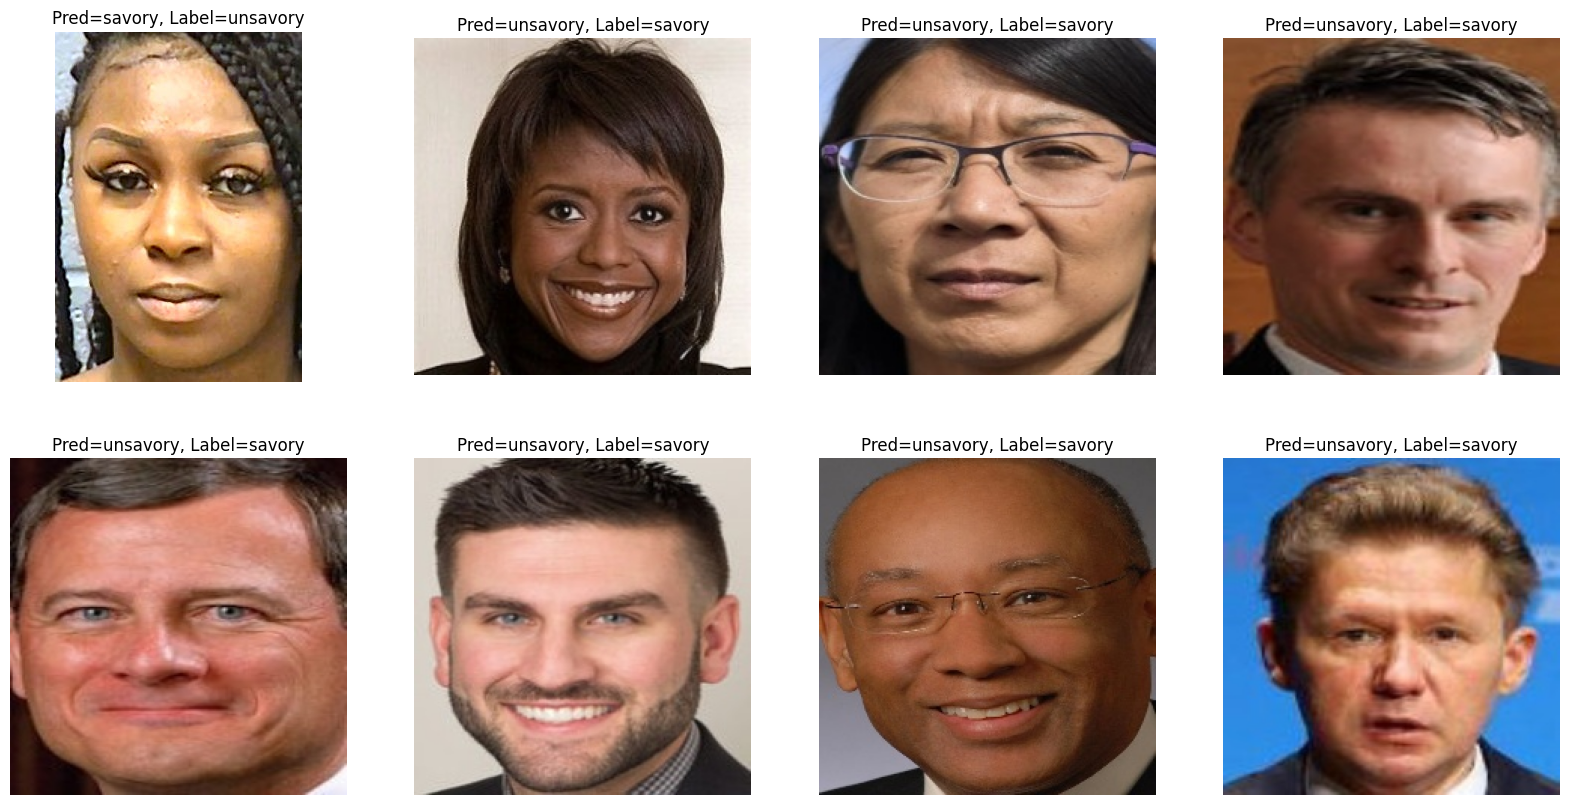

In [10]:
BOVW.show_results(bovw.model, histogram_test, labels_test, test_images_path, show_positive=False)

## CBIR from 0

In [11]:
for p in test_images_path:
    pred, k_similar = BOVW.cbir('./bovw/bovw.pkl', p, './bovw/train_bovw.pkl', './bovw/train_paths.pkl')
    print(pred)
    print(k_similar)
    break

BOVW computed in: 0.0014416000012715813
KDTree computed in: 0.161849500000244
10 most similar found in: 0.0013479000008373987
['savory']
['..\\..\\..\\dataset\\train\\savory\\3952.jpg', '..\\..\\..\\dataset\\train\\unsavory\\4164.jpg', '..\\..\\..\\dataset\\train\\savory\\2596.jpg', '..\\..\\..\\dataset\\train\\unsavory\\1181.jpg', '..\\..\\..\\dataset\\train\\unsavory\\3368.jpg', '..\\..\\..\\dataset\\train\\unsavory\\5263.jpg', '..\\..\\..\\dataset\\train\\unsavory\\1760.jpg', '..\\..\\..\\dataset\\train\\unsavory\\3015.jpg', '..\\..\\..\\dataset\\train\\savory\\5340.jpg', '..\\..\\..\\dataset\\train\\unsavory\\2566.jpg']
